In [1]:
# get data

import json
def extractData(file_path) -> dict:
    data_dict = {}
    with open(file_path) as file:
        # for each line in the json line file, each line corresponds to one frame
        for idx, line in enumerate(file):
            # load the json line as a dictionary
            data = json.loads(line)
            data_dict[idx] = data
    return data_dict

data = extractData("output/re_id/pose_reid.jl")

In [12]:
# getPositionOfAllPeopleInOneFrame

def centerBoundingBox(bbox) -> tuple:
    [tl_coord2d_x, tl_coord2d_y] = bbox["tl_coord2d"]
    [br_coord2d_x, br_coord2d_y] = bbox["br_coord2d"]
    
    center_x = (tl_coord2d_x + br_coord2d_x) / 2
    center_y = (tl_coord2d_y + br_coord2d_y) / 2

    return (center_x, center_y)

def getAllCenters(frame_data):
    bboxs = frame_data["approach"]

    centers = {}
    for id, bbox in bboxs.items():
        centers[id] = centerBoundingBox(bbox)
    
    return centers

centers = getAllCenters(data[10])

for label, world_point in centers.items():
    print(f'{label}: {world_point}')

12: (117.0, 291.0)
11: (440.0, 221.0)
10: (492.0, 380.0)
9: (597.0, 509.0)
8: (36.0, 209.0)
7: (60.0, 179.5)
6: (383.0, 485.0)
5: (259.0, 403.0)
4: (733.0, 437.0)
3: (590.0, 279.0)
2: (960.0, 273.0)
1: (564.0, 571.5)


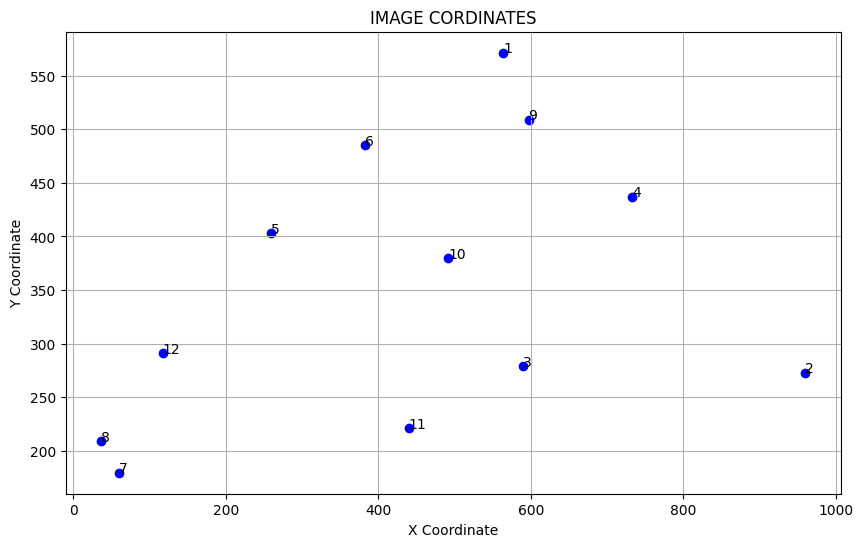

In [8]:
# visualize image cordinates
import matplotlib.pyplot as plt

x_coords = [coord[0] for coord in centers.values()]
y_coords = [coord[1] for coord in centers.values()]

plt.figure(figsize=(10, 6))
plt.scatter(x_coords, y_coords, color='blue', marker='o')

for label, (x, y) in centers.items():
    plt.text(x, y, label)

plt.title('IMAGE CORDINATES')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.grid(True)
plt.show()

In [11]:
import numpy as np

def pixel_to_world(pixel_coords, camera_parameters):
    """Converts pixel coordinates to world coordinates.

    Args:
    pixel_coords: The pixel coordinates in (u, v) format.
    camera_parameters: The camera parameters, including the intrinsics and extrinsics.

    Returns:
    The world coordinates of the pixel.
    """

    # Define the pixel center.
    print(pixel_coords)
    pixel_center = (pixel_coords[1] / 2, pixel_coords[0] / 2)

    # Calculate the pixel to world transformation matrix.
    pixel_to_world_matrix = camera_parameters.get_pixel_to_world_matrix()

    # Multiply the pixel coordinates by the pixel to world transformation matrix.
    world_coords = np.matmul(pixel_to_world_matrix, pixel_coords - pixel_center)

    return world_coords

In [6]:
class CameraParameters:
    """Defines the camera parameters.

    Attributes:
    focal_length: The focal length of the camera in pixels.
    principal_point: The principal point of the camera in pixels.
    skew: The skew of the camera.
    translation: The translation of the camera in world coordinates.
    rotation: The rotation of the camera in world coordinates.
    """

    def __init__(self, focal_length=(1000, 1000), principal_point=(500, 500),
                skew=0, translation=(0, 0, 0), rotation=np.eye(3)):
        """Initializes the camera parameters.

        Args:
            focal_length: The focal length of the camera in pixels.
            principal_point: The principal point of the camera in pixels.
            skew: The skew of the camera.
            translation: The translation of the camera in world coordinates.
            rotation: The rotation of the camera in world coordinates.
        """
        self.focal_length = focal_length
        self.principal_point = principal_point
        self.skew = skew
        self.translation = translation
        self.rotation = rotation

    def get_pixel_to_world_matrix(self):
        """Gets the pixel to world transformation matrix.

        Returns:
            The pixel to world transformation matrix.
        """
        K = np.array([[self.focal_length[0], 0, self.principal_point[0]],
                        [0, self.focal_length[1], self.principal_point[1]],
                        [0, 0, 1]])
        R = self.rotation
        t = np.array(self.translation)

        pixel_to_world_matrix = np.linalg.inv(K) @ R @ np.vstack((t, [1]))

        return pixel_to_world_matrix


In [12]:
camera_parameters = CameraParameters()

# Define the pixel coordinates.
pixel_coords = np.array([200, 200])

# Convert the pixel coordinates to world coordinates.
world_coords = pixel_to_world(pixel_coords, camera_parameters)

print(world_coords)

[200 200]


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3 and the array at index 1 has size 1